In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import clustering_utils
from itertools import combinations

In [2]:
users_df = pd.read_csv("dataset/users_df_dataset_cleaned_with_indicators.csv")
users_df.dropna(inplace=True)
users_df.info(verbose=True)
users_df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11108 entries, 0 to 11108
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   user_id                            11108 non-null  int64 
 1   name                               11108 non-null  object
 2   lang                               11108 non-null  object
 3   bot                                11108 non-null  int64 
 4   created_at                         11108 non-null  object
 5   statuses_count                     11108 non-null  int64 
 6   account_age_in_days                11108 non-null  int64 
 7   number_of_tweets                   11108 non-null  int64 
 8   account_average_tweets_per_day     11108 non-null  int64 
 9   avg_tweets_per_actual_day          11108 non-null  int64 
 10  day_with_most_tweets               11108 non-null  object
 11  max_number_of_tweet_in_a_day       11108 non-null  int64 
 12  covi

,user_id,bot,statuses_count,account_age_in_days,number_of_tweets,account_average_tweets_per_day,avg_tweets_per_actual_day,max_number_of_tweet_in_a_day,covid19_num_of_tweets,avg_hashtags,...,avg_mentions,avg_special_char_in_text,total_likes,avt_favorite_count,total_replies,avt_reply_count,total_retweet_count,account_discussion_creation_ratio,tweet_num_likes_ratio,tweet_num_replies_ratio
count,1.110800e+04,11108.000000,11108.000000,11108.000000,11108.000000,11108.000000,11108.000000,11108.000000,11108.000000,11108.000000,...,11108.000000,11108.000000,1.110800e+04,11108.000000,1.110800e+04,11108.000000,1.110800e+04,11108.000000,11108.000000,11108.000000
mean,1.263557e+09,0.550594,485.581023,1827.635938,941.462099,0.153493,12.950756,52.167267,273.983885,0.017465,...,0.069680,15.491538,3.207350e+03,17.557076,9.357382e+02,0.573281,5.260731e+05,19.342636,17.052575,4.088315
std,9.362939e+08,0.497456,1239.154853,555.101424,1199.280505,0.567041,37.965445,87.945867,732.176632,0.156090,...,0.269059,5.579211,9.749861e+04,335.746036,2.983883e+04,12.386150,2.930989e+06,80.930592,46.417057,29.038074
min,6.780330e+05,0.000000,0.000000,891.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,4.662897e+08,0.000000,41.000000,1312.000000,67.000000,0.000000,1.000000,6.000000,0.000000,0.000000,...,0.000000,13.000000,3.000000e+00,0.000000,0.000000e+00,0.000000,3.000000e+00,0.000000,0.000000,0.000000
50%,1.127886e+09,1.000000,68.000000,1702.000000,132.000000,0.000000,4.000000,18.000000,0.000000,0.000000,...,0.000000,15.000000,1.000000e+01,0.000000,0.000000e+00,0.000000,7.650000e+01,0.000000,7.000000,0.000000
75%,2.356965e+09,1.000000,81.000000,2080.000000,1703.000000,0.000000,8.000000,75.000000,78.250000,0.000000,...,0.000000,17.000000,3.892500e+02,0.000000,0.000000e+00,0.000000,6.465900e+04,20.000000,20.000000,0.000000
max,3.164942e+09,1.000000,7226.000000,3901.000000,3668.000000,6.000000,1759.000000,2131.000000,3559.000000,6.000000,...,5.000000,149.000000,7.006348e+06,13542.000000,2.000000e+06,603.000000,9.638758e+07,3519.000000,2877.000000,1762.000000


# K-MEANS

In [18]:
indicator_columns_users = ['account_average_tweets_per_day', 'avg_tweets_per_actual_day', 'covid19_num_of_tweets', 'avg_hashtags', 
                            'avg_text_length', 'avg_mentions', 'avg_special_char_in_text', 'avt_favorite_count', 'total_replies',
                            'avt_reply_count', 'total_retweet_count', 'account_discussion_creation_ratio', 'tweet_num_likes_ratio',
                            'tweet_num_replies_ratio']

all_possible_combinations = list(combinations(indicator_columns_users, 2))
combination = all_possible_combinations[43]

In [4]:
subset_df = users_df[list(combination)]
scaler = StandardScaler()
scaler.fit(subset_df.values)
transform_result = scaler.fit_transform(subset_df.values)

In [5]:
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=100)
kmeans.fit(transform_result)

KMeans(max_iter=100, n_clusters=5)

Plotting the sizes of the clusters

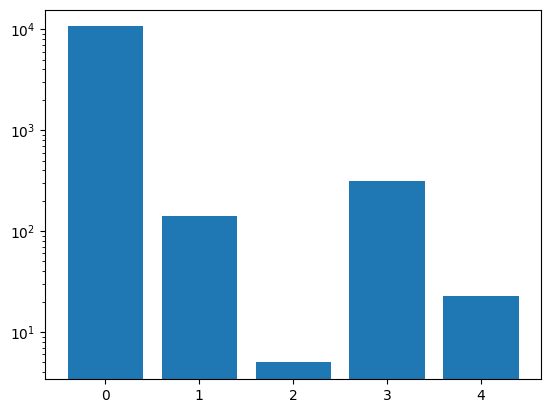

In [16]:
clusters_id, clusters_sizes = np.unique(kmeans.labels_, return_counts=True)

plt.bar(x=clusters_id, height=clusters_sizes, log=True)
plt.show()

Plotting the distribution of bot and non-bots inside each cluster (TO BE DONE - Gianluca)

Plotting the scatterplot to show relations about the clustering attributes

('avg_hashtags', 'account_discussion_creation_ratio')


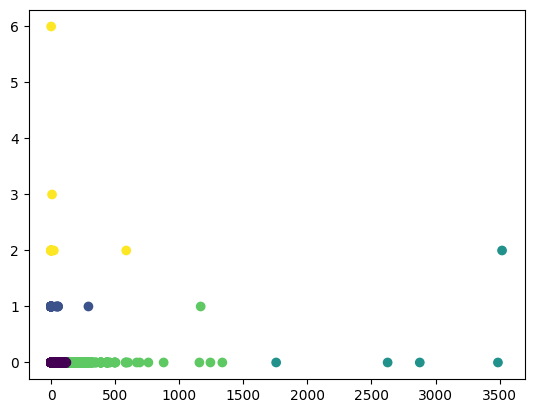

In [7]:
plt.scatter(data=users_df, x=combination[1], y=combination[0],c=kmeans.labels_)
plt.show()

In [8]:
clustering_utils.print_clustering_metrics(kmeans, transform_result)

SSE 3122.9412727107974
Silhouette 0.9040207411745843
Separation 0.3951739044756486
